In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pickle
import seaborn as sns; sns.set(style ='white', color_codes = True)

In [2]:
college_nba = pd.read_csv('college_noname.csv', index_col = 0)

In [3]:
features = college_nba.drop(['drafted'], axis = 1)

### Confusion Matrix Function Plot

In [4]:
labels = ['Drafted', 'Not Drafted']
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    # Compute confusion matrix
    cmat = pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

### K Nearest Neighbor

In [7]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=7)
# the n_neighbors is the parameter where you specify k

In [38]:
#first model uses only pressure at 3p to predict whethter it will rain tomrorow
#can you improve it? 
y = college_nba['drafted']

X  = features

In [39]:
#train_test_littttttt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Cross Validation

In [110]:
knn_cv_score = cross_val_score(knn, X_train, y_train, cv=3)
mean_knn_cv_score = np.mean(knn_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_knn_cv_score * 100))

Mean Cross Validation Score: 74.79%


### Model Testing

In [48]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [41]:
# predict the response for new observations
test_preds = knn.predict(X_test)

In [42]:
#how well did our model predict our correct class? 
accuracy_score(y_test, test_preds)

0.8234106962663976

In [111]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)
print(f'\n{classification_report(y_test, test_preds)}')

Precision Score: 0.7745098039215687
Recall Score: 0.6909620991253644
Accuracy Score: 0.8234106962663976
F1 Score: 0.7303543913713405

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       648
           1       0.77      0.69      0.73       343

    accuracy                           0.82       991
   macro avg       0.81      0.79      0.80       991
weighted avg       0.82      0.82      0.82       991



Predicted    0    1  All
True                    
0          579   69  648
1          106  237  343
All        685  306  991


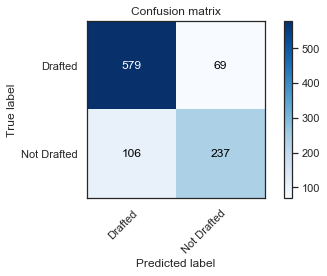

In [112]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_preds, classes=labels,
                      title='Confusion matrix')

plt.show()

# print(confusion_matrix(y_test, test_preds, labels=None, sample_weight=None))

## Search Optimal Value Of K for KNN

In [106]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [107]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 7
F1-Score: 0.6835443037974683


In [108]:
# search for an optimal value of K for KNN
k_range = list(range(1, 3))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.7184435883894437, 0.7119398723838682]


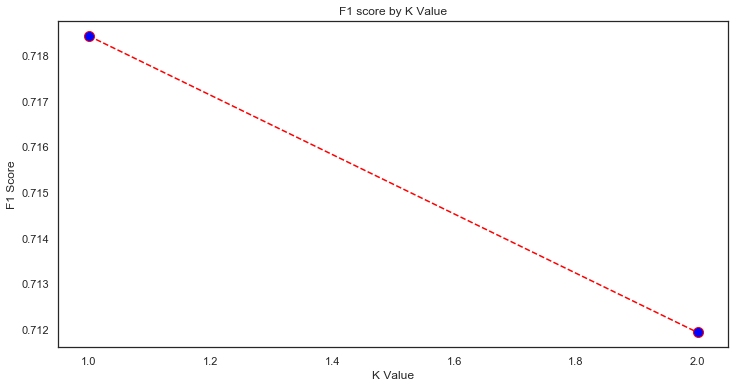

In [109]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 3), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

## Search Optimal Value Of K for KNN Standard Scalar

In [72]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [101]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  


model = KNeighborsClassifier(n_neighbors= 21)
model.fit(X_train_scaled, y_train)

test_pred_scaled = model.predict(X_test_scaled)

In [102]:
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)

Best Value for k: 21
F1-Score: 0.7053291536050156


In [103]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_pred_scaled)
# print(confusion_matrix(y_test, test_pred_scaled, labels=None, sample_weight=None))
print(f'\n{classification_report(y_test, test_pred_scaled)}')

Precision Score: 0.7627118644067796
Recall Score: 0.6559766763848397
Accuracy Score: 0.8102926337033299
F1 Score: 0.7053291536050156

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       648
           1       0.76      0.66      0.71       343

    accuracy                           0.81       991
   macro avg       0.80      0.77      0.78       991
weighted avg       0.81      0.81      0.81       991



Predicted    0    1  All
True                    
0          579   69  648
1          106  237  343
All        685  306  991


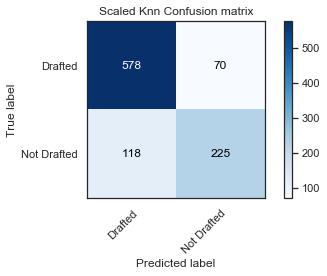

In [113]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_pred_scaled, classes=labels,
                      title='Scaled Knn Confusion matrix')

plt.show()

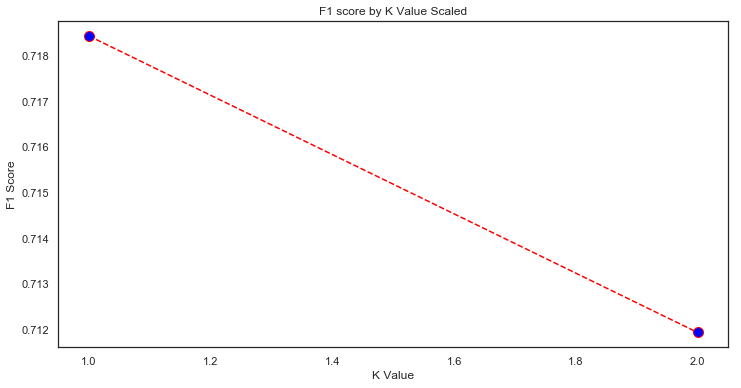

In [114]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 3), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value Scaled')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

## Grid Search KNN

In [87]:
knn_grid_param = {'n_neighbors': [3,5,9,17,21],
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'manhattan'] }
knn_grid_search = GridSearchCV(knn, knn_grid_param, verbose=1, cv=3, n_jobs=-1)

knn_gs_results = knn_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.5s finished


In [94]:
# knn_gs_training_score = np.mean(knn_grid_search.cv_results_['mean_train_score'])
# knn_gs_testing_score =  knn_grid_search.score(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = knn_grid_search.predict(X_test)

# New Model Evaluation metrics 
# print("Mean Training Score:", knn_gs_training_score*100)
# print("Mean Testing Score:", knn_gs_testing_score*100)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))
print("Best Parameter Found:")
print(knn_grid_search.best_params_)
print("\nBest Estimator Found:")
print(knn_grid_search.best_estimator_)
print("Besti Score Found:")
print(knn_grid_search.best_score_)

Accuracy Score : 0.8163471241170535
Precision Score : 0.7710437710437711
Recall Score : 0.6676384839650146
F1 Score : 0.7156250000000001
Best Parameter Found:
{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}

Best Estimator Found:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')
Besti Score Found:
0.808055693684734


### Grid Search Confusion Matrix

Predicted    0    1  All
True                    
0          579   69  648
1          106  237  343
All        685  306  991


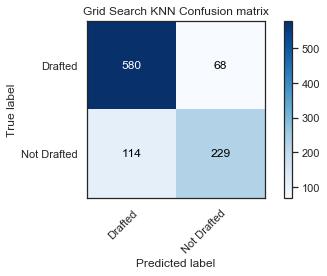

In [115]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_acc, classes=labels,
                      title='Grid Search KNN Confusion matrix')

plt.show()

# #Logistic Regression (Grid Search) Confusion matrix
# confusion_matrix(y_test,y_pred_acc)